In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_points(mean, std, num_points):
    return np.random.normal(mean, std, num_points)

In [3]:
def check(points, distance_threshold=0.9, min_points_within=4):
    sorted_points = np.argsort(points)
    for ix in range(len(sorted_points)):
        if (
            ix - min_points_within + 1 >= 0
            and points[sorted_points[ix]]
            - points[sorted_points[ix - min_points_within + 1]]
            < distance_threshold
        ):
            return True
    return False

In [4]:
points1 = np.array([1, 5, 12, 13, 14, 15, 20])
check(points1, 3, 5)

False

In [5]:
p2 = []
x2 = []
y2 = []
for num_points in np.arange(4, 26, 1):
    for dist_threshold in np.arange(10, 61, 1):
        mean = 0
        std = 100
        distance_threshold = dist_threshold
        min_points_within = 4

        num = 0
        for i in range(50000):
            i = i + 1
            points = generate_points(mean, std, num_points)

            aaa = check(
                points,
                distance_threshold=distance_threshold,
                min_points_within=min_points_within,
            )
            if aaa:
                num = num + 1
        x2.append(dist_threshold)
        y2.append(num_points)
        p2.append(num / 50000)

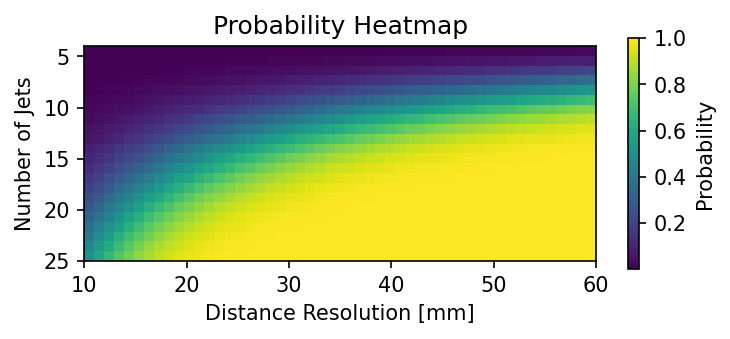

In [6]:
x_min, x_max = min(x2), max(x2)
y_min, y_max = min(y2), max(y2)

heatmap = np.zeros((y_max - y_min + 1, x_max - x_min + 1))

for x, y, p in zip(x2, y2, p2):
    heatmap[y - y_min, x - x_min] = p

plt.figure(figsize=(5.5, 2.5), dpi=150)
plt.imshow(heatmap, extent=[x_min, x_max, y_max, y_min], origin="upper", cmap="viridis")
plt.colorbar(label="Probability", shrink=0.8)
plt.xlabel("Distance Resolution [mm]")
plt.ylabel("Number of Jets")
plt.title("Probability Heatmap")
plt.show()

In [23]:
1 - heatmap[6, 24]

0.62322